In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pairwise = pd.read_csv("datasets/pairwise_variables.csv")
attributes = pd.read_csv("datasets/subreddit_attributes.csv")

# Subreddit Attribute Overview
## 4,091 subreddits in the dataset
1. Mean Comment Score is usually 1-9
2. Mean Comment Length is about 20-380 characters.
3. Mean Post Length is between 1 million and 14 million characters.
4. Max Subscribers is between 30,000 and 160,000
5. Distict Commenters is between 0 to 50,000
6. Number of Interactions is about 5-14 (Comments/Post)




# Pairwise Subreddits Overview
## 47,186 subreddits in the dataset
### Estimate & t-test is different for each pair 
### Author, term, & cross-posting is the same for pairs (r/dogs & r/cats vs r/cats & r/dogs)
7. Subreddits usually have little competition or mutualism (using "estimate" p < 0.05)
8. Subreddit t-test is confusing (using "t-test" p < 0.05)
9. HIGH Author similarity: Most subreddits have 70-95% author similarity
10. HIGH Term similarity: Most subreddits have 70-95% Term similarity
11. Author vs. Term Similarity (Covariance) 
- Some reddits have no overlap of terms or authors
- Some reddits have LOTS OF overlap of terms and authors
- Some reddits have lots of the same authors but less similar terms
- Some reddits have lots of the same terms but different authors



## Z-Scores and Quartiles

In a normal distribution:
- within + or - 1 z-score is 68% of the data, or from 16%-84%
- within + or - 2 z-scores is 95% of the data, or from 2.5%-97.5%
- within + or - 3 z-scores is 99.7% of the data, or from 0.15%-99.85%

In quartiles:
- median (Q2/50th%): the middle value of the dataset.
- 1st quartile (Q1/25th%): the middle number between the smallest number and the median.
- 3rd quartile (Q3/75th%): the middle value between the median and the highest value of the dataset.
- Interquartile range (IQR): 25th to the 75th percentile.
- “maximum”: Q3 + 1.5*IQR
- “minimum”: Q1 -1.5*IQR
- whiskers: minimum and maximum
- outliers: dots outside of the boxplot

# Size Strategy
Anything with a z-score over 3 or under -3 has the max or min, respectively, of a subreddit with the z-score of 3. this is because there is less than 0.3% of the data in this area, it is definitionally outliers, and will skew the size of the bubbles and make the graph less readable.

def size:
    if variable_scaled > 3:
        variable_scaled = 3
    if variable_scaled < -3:
        variable_scaled = -3

from -3 to 3 should be a scale of bubble size. Let's say subreddit size goes from 20px to 200px linearly. 
m(-3) + b = min
m(3) + b = max

b = 3m + min
m = (max - (3m + min)) / 3

variable_size = m(variable_scaled) + b


area is gonna be linear from 1-7 units
area = pi*r^2
r = sqrt(area/pi)


In [11]:
def radius(areas):
    for area in areas:
        rad = np.sqrt(area/np.pi)
        print(np.round(rad, 2))
areas =  np.array([1, 2, 3, 4, 5, 6, 7])
areas1 = areas
areas2 = areas * 2
areas3 = areas * 3
areas4 = areas * 4

print(radius(areas))
print(radius(areas4))


# sigmoid function is interval between 0-1
# use it to ensure everything falls in that interval
# Kurtosis -- mean is expected value, variance is expected ...skew....kurtosis (more sensitive to outliers) 
# arctan
# 

0.56
0.8
0.98
1.13
1.26
1.38
1.49
None
1.13
1.6
1.95
2.26
2.52
2.76
2.99
None


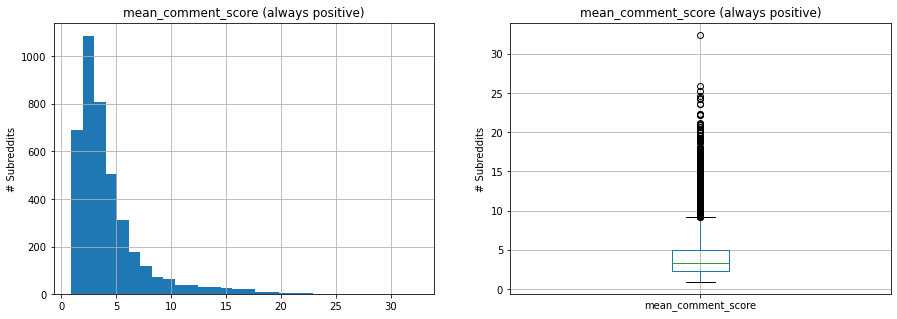

In [14]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
mean_comment_score = attributes['mean_comment_score'].hist(bins=30)
plt.ylabel('# Subreddits')
plt.title('mean_comment_score (always positive)')
plt.subplot(1, 2, 2)
mean_comment_score_boxplot = attributes.boxplot('mean_comment_score')
plt.ylabel('# Subreddits')
plt.title('mean_comment_score (always positive)')
plt.savefig("datavizzes/mean_comment_score.jpg")

9.19021776510288
0.8775751929731168
0.8775751929731168


Text(0.5, 1.0, 'mean_comment_score (always positive)')

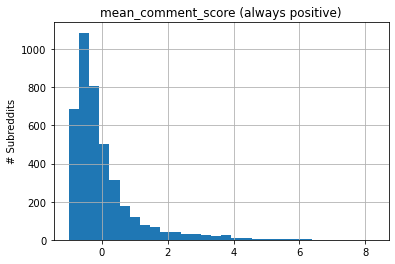

In [23]:
Q3 = np.quantile(attributes['mean_comment_score'], 0.75)
Q1 = np.quantile(attributes['mean_comment_score'], 0.25)
IQR = Q3 - Q1
max_q = min(Q3 + 1.5*IQR, attributes['mean_comment_score'].max())
min_q = max(Q1 - 1.5*IQR, attributes['mean_comment_score'].min())

print(max_q)
print(min_q)

msc = attributes['mean_comment_score']

attributes['mean_comment_score_scaled'] = (attributes['mean_comment_score'] - attributes['mean_comment_score'].mean()) / attributes['mean_comment_score'].std()  

msc_scaled = attributes['mean_comment_score_scaled'].hist(bins=30)
plt.ylabel('# Subreddits')
plt.title('mean_comment_score (always positive)')
# msc_boxplot = attributes.boxplot('mean_comment_score')
# plt.ylabel('# Subreddits')
# plt.title('mean_comment_score (always positive)')

mean_comment_score:
    Q3 = np.quantile(data[col], 0.75)
    Q1 = np.quantile(data[col], 0.25)
    IQR = Q3 - Q1